In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

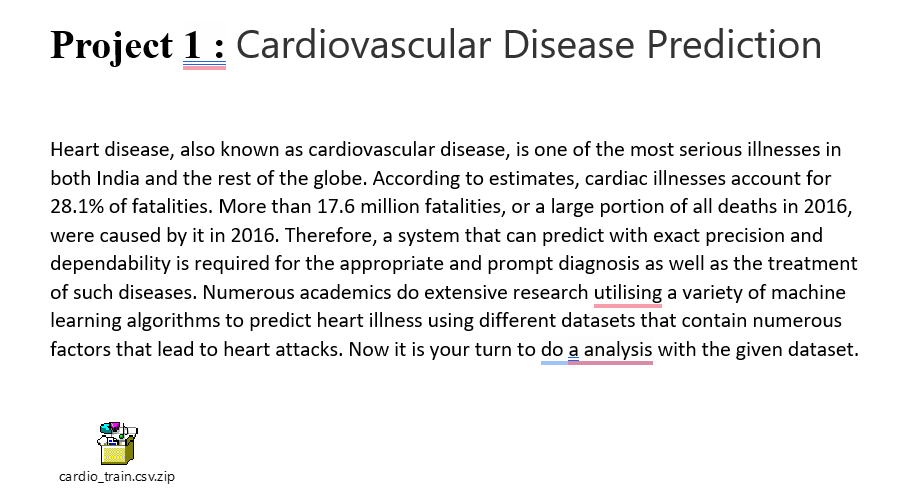

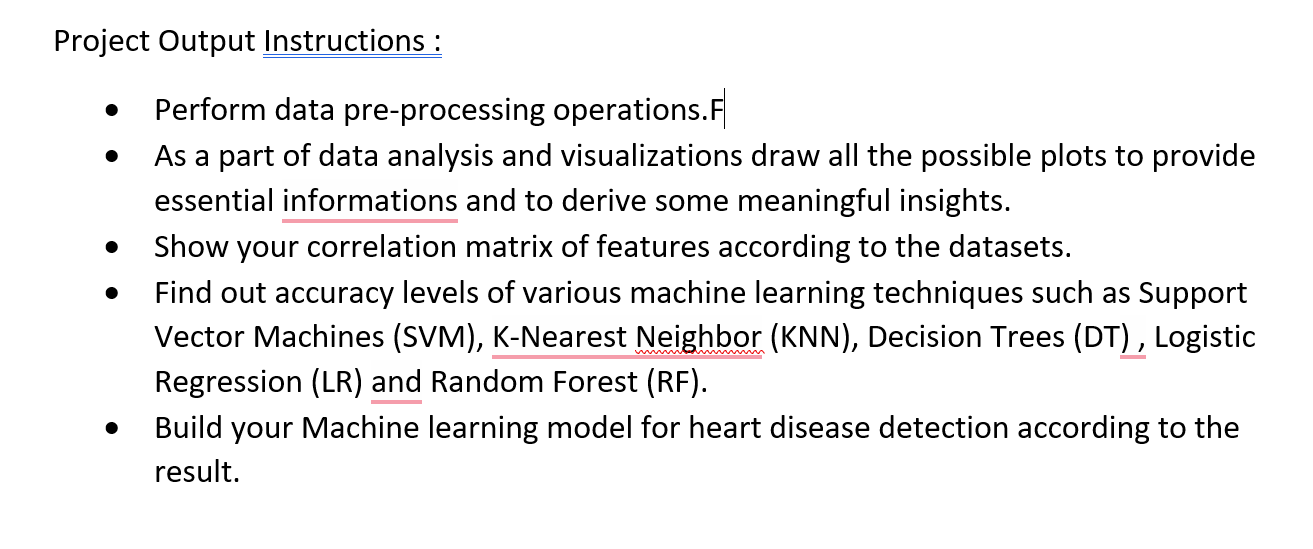

In [7]:
df = pd.read_csv('/kaggle/input/cardio/cardio_train.csv', sep=';')


In [8]:
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [9]:
print(df.isnull().sum())


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [10]:
print(df.dtypes)

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


# **DATA PRE PROCESSING**

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['age'] = df['age'] / 365.25

In [13]:
print(df.describe())


                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     53.302850      1.349571    164.359229     74.205690   
std    28851.302323      6.754967      0.476838      8.210126     14.395757   
min        0.000000     29.563313      1.000000     55.000000     10.000000   
25%    25006.750000     48.361396      1.000000    159.000000     65.000000   
50%    50001.500000     53.943874      1.000000    165.000000     72.000000   
75%    74889.250000     58.390144      2.000000    170.000000     82.000000   
max    99999.000000     64.922656      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250    

# **EDA**

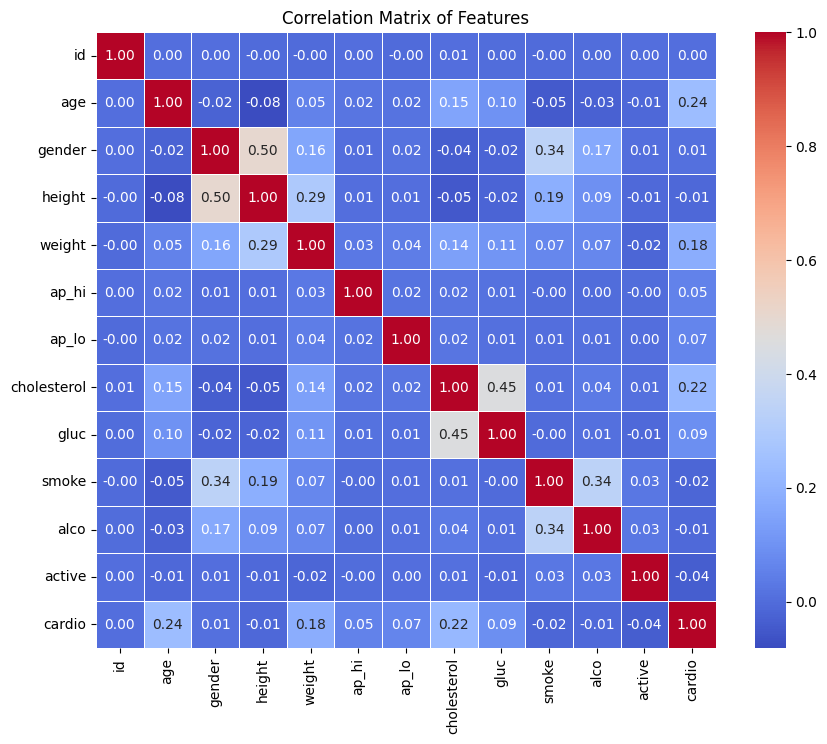

In [29]:
# Compute the correlation matrix
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

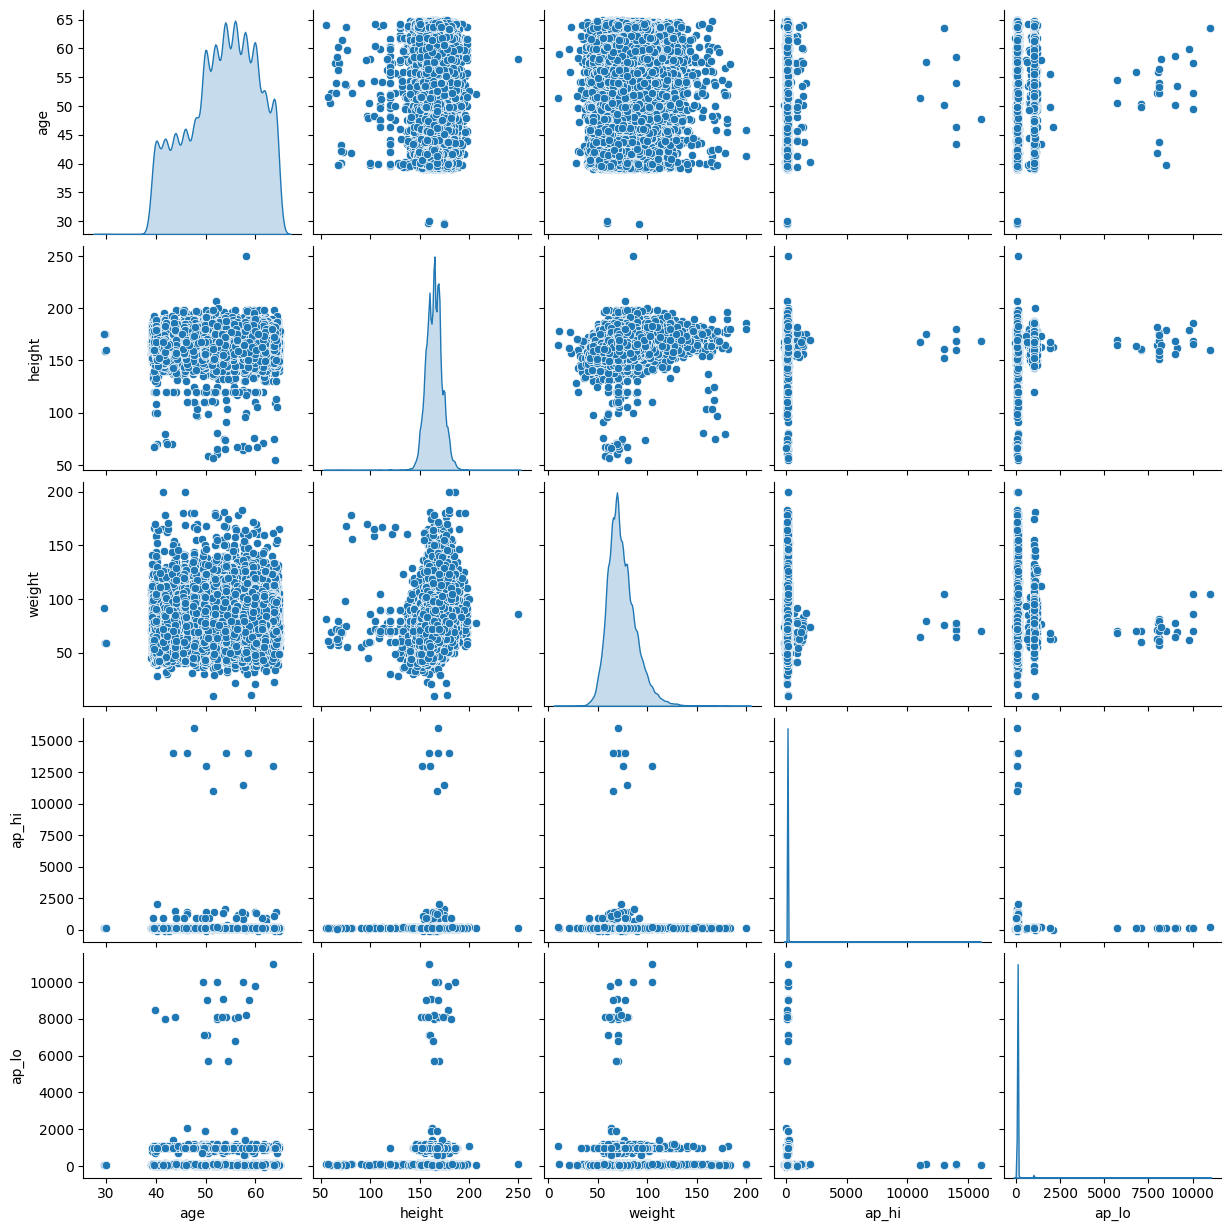

In [14]:
sns.pairplot(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']], diag_kind='kde')
plt.show()

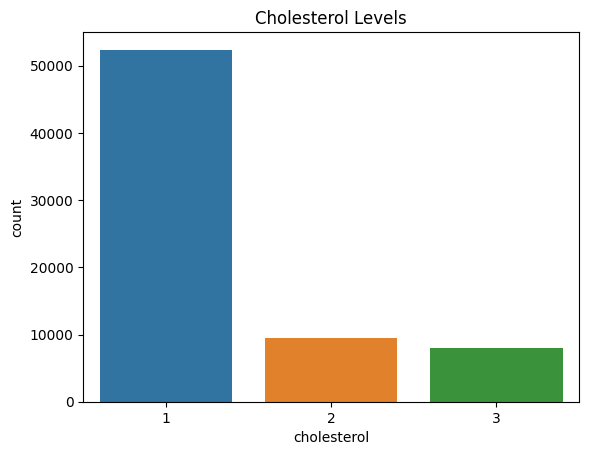

In [15]:
sns.countplot(x='cholesterol', data=df)
plt.title('Cholesterol Levels')
plt.show()

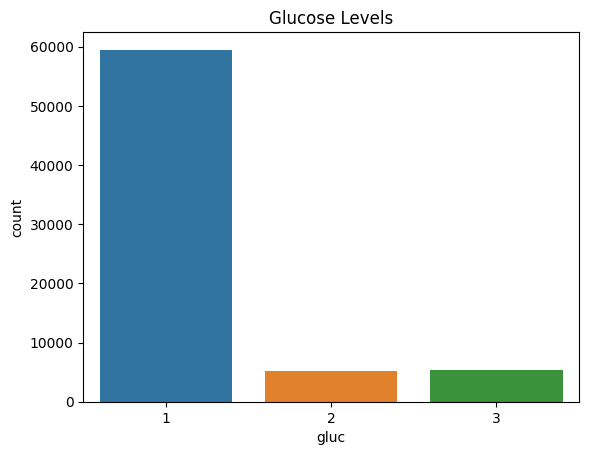

In [16]:
sns.countplot(x='gluc', data=df)
plt.title('Glucose Levels')
plt.show()

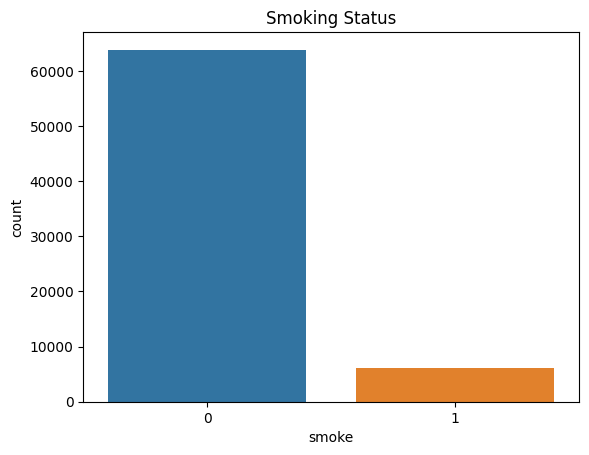

In [17]:
sns.countplot(x='smoke', data=df)
plt.title('Smoking Status')
plt.show()

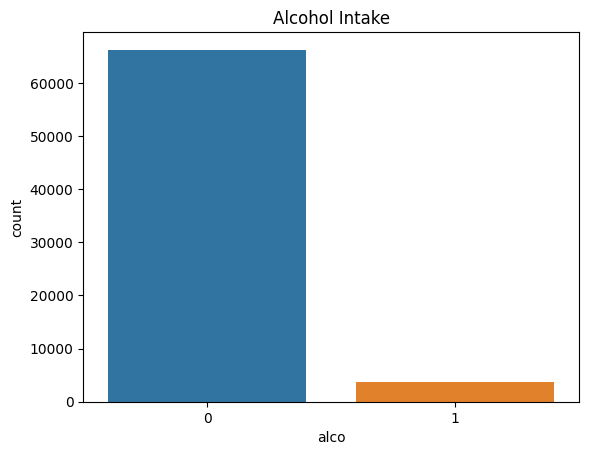

In [18]:
sns.countplot(x='alco', data=df)
plt.title('Alcohol Intake')
plt.show()

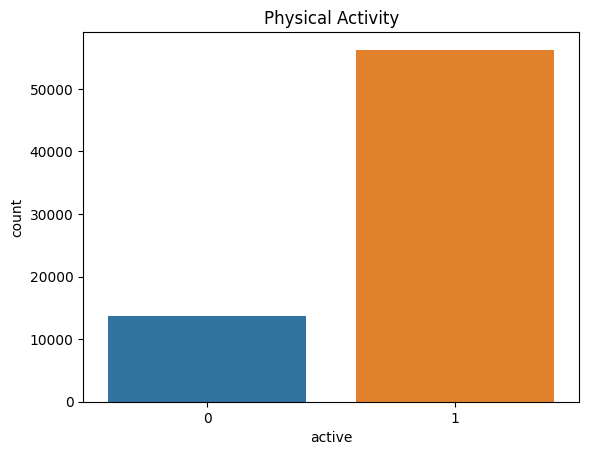

In [19]:
sns.countplot(x='active', data=df)
plt.title('Physical Activity')
plt.show()

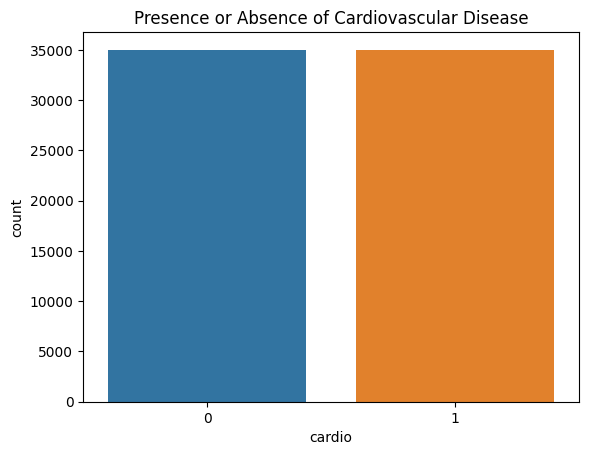

In [20]:
sns.countplot(x='cardio', data=df)
plt.title('Presence or Absence of Cardiovascular Disease')
plt.show()

# **Comparing Machine Learning Models**

In [34]:
df.drop(columns=['id'], inplace=True)

In [35]:
X = df.drop(columns=['cardio'])
y = df['cardio']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
svm_clf = SVC(kernel='linear')
knn_clf = KNeighborsClassifier(n_neighbors=5)
dt_clf = DecisionTreeClassifier(random_state=42)
lr_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
svm_clf.fit(X_train_scaled, y_train)
knn_clf.fit(X_train_scaled, y_train)
dt_clf.fit(X_train_scaled, y_train)
lr_clf.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [39]:
svm_pred = svm_clf.predict(X_test_scaled)
knn_pred = knn_clf.predict(X_test_scaled)
dt_pred = dt_clf.predict(X_test_scaled)
lr_pred = lr_clf.predict(X_test_scaled)
rf_pred = rf_clf.predict(X_test_scaled)

In [40]:
print("Support Vector Machine (SVM) Accuracy:", accuracy_score(y_test, svm_pred))
print("K-Nearest Neighbors (KNN) Accuracy:", accuracy_score(y_test, knn_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Support Vector Machine (SVM) Accuracy: 0.7264285714285714
K-Nearest Neighbors (KNN) Accuracy: 0.6499285714285714
Decision Tree Accuracy: 0.6284285714285714
Logistic Regression Accuracy: 0.7236428571428571
Random Forest Accuracy: 0.7129285714285715


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


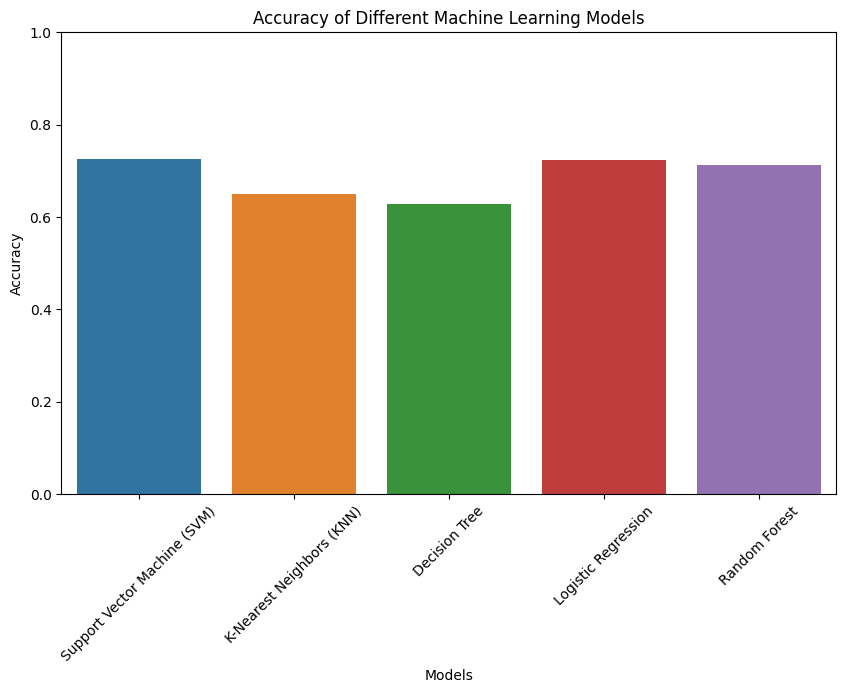

In [41]:
accuracy_scores = {
    "Support Vector Machine (SVM)": accuracy_score(y_test, svm_pred),
    "K-Nearest Neighbors (KNN)": accuracy_score(y_test, knn_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "Random Forest": accuracy_score(y_test, rf_pred)
}


plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Accuracy of Different Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()


# **BULDING A CLASSIFICATION MODEL**

**By taking user inputs**

In [42]:
def predict_heart_disease(age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active):
    # Create a DataFrame with user inputs
    user_data = pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'height': [height],
        'weight': [weight],
        'ap_hi': [ap_hi],
        'ap_lo': [ap_lo],
        'cholesterol': [cholesterol],
        'gluc': [gluc],
        'smoke': [smoke],
        'alco': [alco],
        'active': [active]
    })

    
    user_data_scaled = scaler.transform(user_data)

    
    prediction = lr_clf.predict(user_data_scaled)[0]
    probability = lr_clf.predict_proba(user_data_scaled)[0]

    if prediction == 1:
        print("Prediction: You have a high probability of having cardiovascular disease.")
    else:
        print("Prediction: You have a low probability of having cardiovascular disease.")

    print("Probability of having cardiovascular disease:", probability[1])




In [43]:
age = 50
gender = 1  
height = 170
weight = 70
ap_hi = 120
ap_lo = 80
cholesterol = 1
gluc = 1
smoke = 0  
alco = 0   
active = 1 

predict_heart_disease(age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active)

Prediction: You have a low probability of having cardiovascular disease.
Probability of having cardiovascular disease: 0.33256907726948637
